In [1]:
# to access functions from other locations
import sys
sys.path.append('/data/ad181/RemoteDir/rl_robust_owc')

In [2]:
%matplotlib notebook
import numpy as np
import time
import pickle
import os
import matplotlib.pyplot as plt
from copy import deepcopy

import gym
from stable_baselines3.ppo import PPO, MlpPolicy
from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv
from stable_baselines3.common.callbacks import CallbackList
from utils.custom_eval_callback import CustomEvalCallback
from utils.env_wrappers import StateCoarse, BufferWrapper
from typing import Callable
from utils.plot_functions import plot_learning

from model.ressim import Grid
from ressim_env import ResSimEnv_v0, ResSimEnv_v1

/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/co

In [3]:
seed=1
case='case_1_ppo_frozen'

In [4]:
os.makedirs('./data', exist_ok=True)
os.makedirs('./data/'+case, exist_ok=True)

In [5]:
with open('../envs_params/env_data/env_train.pkl', 'rb') as input:
    env_train = pickle.load(input)
k_list_train = env_train.k_list[13]
env_train.set_k( np.array([k_list_train]) )
    
with open('../envs_params/env_data/env_eval.pkl', 'rb') as input:
    env_eval = pickle.load(input)

In [6]:
# env wrapper parameters
x_coords, y_coords = env_train.p_x, env_train.p_y

def env_wrappers(env, x_coords, y_coords):
    env_ = deepcopy(env)
    env_ = StateCoarse(env_, x_coords, y_coords, include_well_pr=True)
    return env_

In [7]:
def make_env(env, rank: int, seed: int) -> Callable:
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :return: (Callable)
    """
    def _init() -> gym.Env:
        env_ = env
        env_.seed(seed + rank)
        return env_
    return _init

In [8]:
# test run
# env = StateCoarse(env_train, x_coords, y_coords, include_well_pr=True)
# print(env.observation_space)
# base_action = np.ones(env.action_space.shape[0])

# state, done = env.reset(), False
# print(state)
# while not done:
#     state, reward, done, info = env.step(base_action)
#     print(state.shape)

seed 1
Box(-100000.0, 100000.0, (93,), float64)
seed 1: model definition ..
Using cuda device
seed 1: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f67e001acf8> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f67e1736fd0>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f67e001acf8> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f67e001ac88>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


-----------------------------
| time/              |      |
|    fps             | 105  |
|    iterations      | 1    |
|    time_elapsed    | 30   |
|    total_timesteps | 3200 |
-----------------------------
Eval num_timesteps=6400, episode_reward=0.56 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.595       |
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 2           |
|    time_elapsed         | 114         |
|    total_timesteps      | 6400        |
| train/                  |             |
|    approx_kl            | 0.009529302 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8

-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 11          |
|    time_elapsed         | 716         |
|    total_timesteps      | 35200       |
| train/                  |             |
|    approx_kl            | 0.009434476 |
|    clip_fraction        | 0.195       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.499       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0559      |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.016      |
|    std                  | 0.055       |
|    value_loss           | 0.0114      |
-----------------------------------------
Eval num_timesteps=38400, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=38400, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
----------

Eval num_timesteps=64000, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=64000, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 5            |
|    mean_reward          | 0.616        |
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 20           |
|    time_elapsed         | 1306         |
|    total_timesteps      | 64000        |
| train/                  |              |
|    approx_kl            | 0.0068102907 |
|    clip_fraction        | 0.192        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.822        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0634       |
|    n_updates            | 380          |
|    policy_

-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 29          |
|    time_elapsed         | 1893        |
|    total_timesteps      | 92800       |
| train/                  |             |
|    approx_kl            | 0.005031643 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.864       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.063       |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.0188     |
|    std                  | 0.055       |
|    value_loss           | 0.00459     |
-----------------------------------------
Eval num_timesteps=96000, episode_reward=0.66 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=96000, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
New best m

Eval num_timesteps=121600, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=121600, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 5            |
|    mean_reward          | 0.643        |
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 38           |
|    time_elapsed         | 2487         |
|    total_timesteps      | 121600       |
| train/                  |              |
|    approx_kl            | 0.0005785203 |
|    clip_fraction        | 0.187        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.879        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0921       |
|    n_updates            | 740          |
|    policy_gradient_loss | -0.0

------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 47           |
|    time_elapsed         | 3056         |
|    total_timesteps      | 150400       |
| train/                  |              |
|    approx_kl            | 0.0015853525 |
|    clip_fraction        | 0.183        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.886        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0577       |
|    n_updates            | 920          |
|    policy_gradient_loss | -0.0177      |
|    std                  | 0.0551       |
|    value_loss           | 0.00426      |
------------------------------------------
Eval num_timesteps=153600, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=153600, episode_reward=0.65 +/- 0.00
Episode length: 5.0

Eval num_timesteps=179200, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=179200, episode_reward=0.65 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.648       |
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 56          |
|    time_elapsed         | 3642        |
|    total_timesteps      | 179200      |
| train/                  |             |
|    approx_kl            | 0.003598013 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.891       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0457      |
|    n_updates            | 1100        |
|    policy_gradient_loss | 

------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 65           |
|    time_elapsed         | 4207         |
|    total_timesteps      | 208000       |
| train/                  |              |
|    approx_kl            | 0.0031535411 |
|    clip_fraction        | 0.177        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.896        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.085        |
|    n_updates            | 1280         |
|    policy_gradient_loss | -0.0172      |
|    std                  | 0.055        |
|    value_loss           | 0.00407      |
------------------------------------------
Eval num_timesteps=211200, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=211200, episode_reward=0.65 +/- 0.00
Episode length: 5.0

Eval num_timesteps=236800, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=236800, episode_reward=0.65 +/- 0.00
Episode length: 5.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 5            |
|    mean_reward          | 0.647        |
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 74           |
|    time_elapsed         | 4796         |
|    total_timesteps      | 236800       |
| train/                  |              |
|    approx_kl            | 0.0026648473 |
|    clip_fraction        | 0.201        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.903        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0667       |
|    n_updates            | 1460         |
|    policy_gradient_loss | -0.0

-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 83          |
|    time_elapsed         | 5353        |
|    total_timesteps      | 265600      |
| train/                  |             |
|    approx_kl            | 0.005132747 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.9        |
|    explained_variance   | 0.906       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0469      |
|    n_updates            | 1640        |
|    policy_gradient_loss | -0.018      |
|    std                  | 0.055       |
|    value_loss           | 0.00361     |
-----------------------------------------
Eval num_timesteps=268800, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=268800, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
--------

Eval num_timesteps=294400, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=294400, episode_reward=0.65 +/- 0.00
Episode length: 5.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.646       |
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 92          |
|    time_elapsed         | 5944        |
|    total_timesteps      | 294400      |
| train/                  |             |
|    approx_kl            | 0.004376266 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.9        |
|    explained_variance   | 0.913       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0992      |
|    n_updates            | 1820        |
|    policy_gradient_loss | -0.0185     |
|    std

<IPython.core.display.Javascript object>


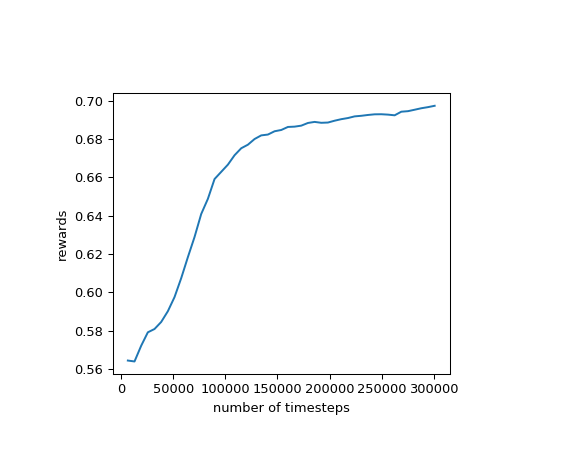

<IPython.core.display.Javascript object>


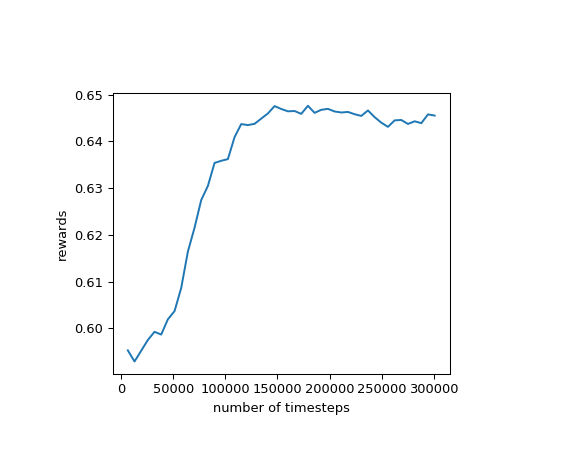

seed 2
Box(-100000.0, 100000.0, (93,), float64)
seed 2: model definition ..
Using cuda device
seed 2: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f67a003a978> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f67a003a588>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f67a003a978> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f67a003a7b8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


------------------------------------------
| time/                   |              |
|    fps                  | 107          |
|    iterations           | 1            |
|    time_elapsed         | 29           |
|    total_timesteps      | 3200         |
| train/                  |              |
|    approx_kl            | 0.0013022018 |
|    clip_fraction        | 0.197        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.9         |
|    explained_variance   | 0.918        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0411       |
|    n_updates            | 1880         |
|    policy_gradient_loss | -0.0179      |
|    std                  | 0.055        |
|    value_loss           | 0.0031       |
------------------------------------------
Eval num_timesteps=6400, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/

Eval num_timesteps=32000, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=32000, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.6         |
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 10          |
|    time_elapsed         | 630         |
|    total_timesteps      | 32000       |
| train/                  |             |
|    approx_kl            | 0.015955128 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.29        |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0802      |
|    n_updates            | 180         |
|    policy_gradient_loss | -0

-----------------------------------------
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 19          |
|    time_elapsed         | 1196        |
|    total_timesteps      | 60800       |
| train/                  |             |
|    approx_kl            | 0.008107832 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.809       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0614      |
|    n_updates            | 360         |
|    policy_gradient_loss | -0.0197     |
|    std                  | 0.0551      |
|    value_loss           | 0.0057      |
-----------------------------------------
Eval num_timesteps=64000, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=64000, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
New best m

Eval num_timesteps=89600, episode_reward=0.66 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=89600, episode_reward=0.63 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 5            |
|    mean_reward          | 0.63         |
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 28           |
|    time_elapsed         | 1782         |
|    total_timesteps      | 89600        |
| train/                  |              |
|    approx_kl            | 0.0027315188 |
|    clip_fraction        | 0.192        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.852        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0397       |
|    n_updates            | 540          |
|    policy_

-----------------------------------------
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 37          |
|    time_elapsed         | 2350        |
|    total_timesteps      | 118400      |
| train/                  |             |
|    approx_kl            | 0.004075601 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.873       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0609      |
|    n_updates            | 720         |
|    policy_gradient_loss | -0.0164     |
|    std                  | 0.0551      |
|    value_loss           | 0.00445     |
-----------------------------------------
Eval num_timesteps=121600, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=121600, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
New best

Eval num_timesteps=147200, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=147200, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 5            |
|    mean_reward          | 0.641        |
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 46           |
|    time_elapsed         | 2929         |
|    total_timesteps      | 147200       |
| train/                  |              |
|    approx_kl            | 0.0048162364 |
|    clip_fraction        | 0.192        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.884        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0838       |
|    n_updates            | 900          |
|    policy_gradient_loss | -0.0

------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 55           |
|    time_elapsed         | 3498         |
|    total_timesteps      | 176000       |
| train/                  |              |
|    approx_kl            | 0.0028127956 |
|    clip_fraction        | 0.171        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.889        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0785       |
|    n_updates            | 1080         |
|    policy_gradient_loss | -0.0167      |
|    std                  | 0.055        |
|    value_loss           | 0.00416      |
------------------------------------------
Eval num_timesteps=179200, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=179200, episode_reward=0.64 +/- 0.00
Episode length: 5.0

Eval num_timesteps=204800, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=204800, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 5             |
|    mean_reward          | 0.641         |
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 64            |
|    time_elapsed         | 4086          |
|    total_timesteps      | 204800        |
| train/                  |               |
|    approx_kl            | 0.00044559955 |
|    clip_fraction        | 0.184         |
|    clip_range           | 0.1           |
|    entropy_loss         | 91.8          |
|    explained_variance   | 0.892         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0796        |
|    n_updates            | 1260          |
|    policy_gradient_loss | -0.0172 

--------------------------------------------
| time/                   |                |
|    fps                  | 50             |
|    iterations           | 73             |
|    time_elapsed         | 4658           |
|    total_timesteps      | 233600         |
| train/                  |                |
|    approx_kl            | -0.00028212072 |
|    clip_fraction        | 0.205          |
|    clip_range           | 0.1            |
|    entropy_loss         | 91.8           |
|    explained_variance   | 0.897          |
|    learning_rate        | 1e-06          |
|    loss                 | 0.0546         |
|    n_updates            | 1440           |
|    policy_gradient_loss | -0.0182        |
|    std                  | 0.055          |
|    value_loss           | 0.00398        |
--------------------------------------------
Eval num_timesteps=236800, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=236800, episode_re

Eval num_timesteps=262400, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=262400, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 5            |
|    mean_reward          | 0.637        |
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 82           |
|    time_elapsed         | 5247         |
|    total_timesteps      | 262400       |
| train/                  |              |
|    approx_kl            | 0.0031293845 |
|    clip_fraction        | 0.202        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.9         |
|    explained_variance   | 0.898        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0721       |
|    n_updates            | 1620         |
|    policy_gradient_loss | -0.0

-----------------------------------------
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 91          |
|    time_elapsed         | 5807        |
|    total_timesteps      | 291200      |
| train/                  |             |
|    approx_kl            | 0.004305329 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.9        |
|    explained_variance   | 0.902       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0611      |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.0162     |
|    std                  | 0.055       |
|    value_loss           | 0.0038      |
-----------------------------------------
Eval num_timesteps=294400, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=294400, episode_reward=0.63 +/- 0.00
Episode length: 5.00 +/- 0.00
--------

<IPython.core.display.Javascript object>


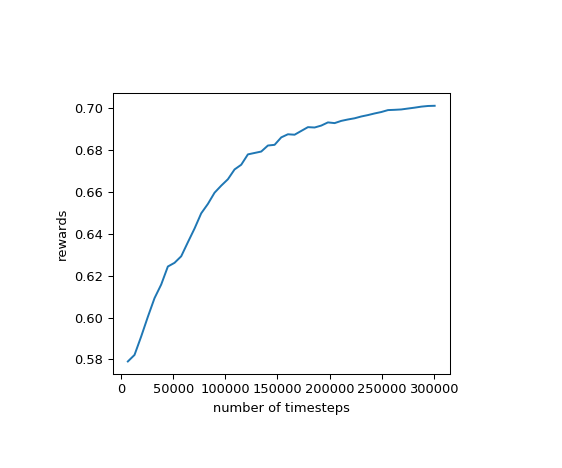

<IPython.core.display.Javascript object>


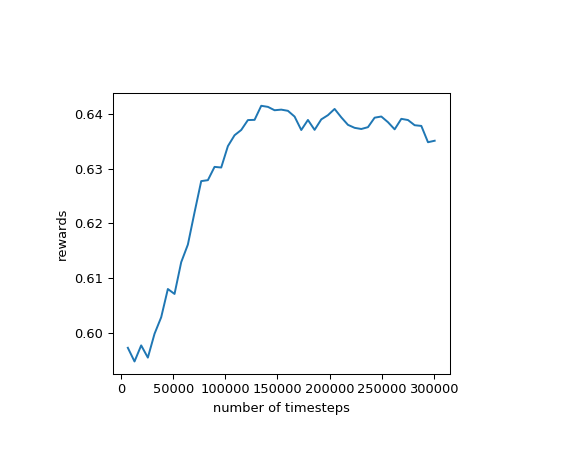

seed 3
Box(-100000.0, 100000.0, (93,), float64)
seed 3: model definition ..
Using cuda device
seed 3: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f679434af28> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f6794344240>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f679434af28> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f67943444a8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


------------------------------------------
| time/                   |              |
|    fps                  | 105          |
|    iterations           | 1            |
|    time_elapsed         | 30           |
|    total_timesteps      | 3200         |
| train/                  |              |
|    approx_kl            | 0.0041105435 |
|    clip_fraction        | 0.219        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.9         |
|    explained_variance   | 0.903        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0684       |
|    n_updates            | 1880         |
|    policy_gradient_loss | -0.019       |
|    std                  | 0.055        |
|    value_loss           | 0.00375      |
------------------------------------------
Eval num_timesteps=6400, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/

Eval num_timesteps=32000, episode_reward=0.57 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=32000, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.603       |
| time/                   |             |
|    fps                  | 52          |
|    iterations           | 10          |
|    time_elapsed         | 614         |
|    total_timesteps      | 32000       |
| train/                  |             |
|    approx_kl            | 0.013908782 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.352       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.104       |
|    n_updates            | 180         |
|    policy_gradient_loss | -0

------------------------------------------
| time/                   |              |
|    fps                  | 51           |
|    iterations           | 19           |
|    time_elapsed         | 1178         |
|    total_timesteps      | 60800        |
| train/                  |              |
|    approx_kl            | 0.0050553824 |
|    clip_fraction        | 0.176        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.816        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0361       |
|    n_updates            | 360          |
|    policy_gradient_loss | -0.0171      |
|    std                  | 0.055        |
|    value_loss           | 0.00537      |
------------------------------------------
Eval num_timesteps=64000, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=64000, episode_reward=0.62 +/- 0.00
Episode length: 5.00 

Eval num_timesteps=89600, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=89600, episode_reward=0.63 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 5            |
|    mean_reward          | 0.632        |
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 28           |
|    time_elapsed         | 1760         |
|    total_timesteps      | 89600        |
| train/                  |              |
|    approx_kl            | 0.0042630434 |
|    clip_fraction        | 0.187        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.865        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0411       |
|    n_updates            | 540          |
|    policy_

------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 37           |
|    time_elapsed         | 2331         |
|    total_timesteps      | 118400       |
| train/                  |              |
|    approx_kl            | 0.0035543155 |
|    clip_fraction        | 0.188        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.856        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0676       |
|    n_updates            | 720          |
|    policy_gradient_loss | -0.0175      |
|    std                  | 0.055        |
|    value_loss           | 0.00505      |
------------------------------------------
Eval num_timesteps=121600, episode_reward=0.66 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=121600, episode_reward=0.65 +/- 0.00
Episode length: 5.0

Eval num_timesteps=147200, episode_reward=0.67 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=147200, episode_reward=0.65 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.654       |
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 46          |
|    time_elapsed         | 2911        |
|    total_timesteps      | 147200      |
| train/                  |             |
|    approx_kl            | 0.002921629 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.87        |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0663      |
|    n_updates            | 900         |
|    policy_gradient_loss | -0.0176     |
|    std

------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 55           |
|    time_elapsed         | 3473         |
|    total_timesteps      | 176000       |
| train/                  |              |
|    approx_kl            | 0.0016578793 |
|    clip_fraction        | 0.202        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.878        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0497       |
|    n_updates            | 1080         |
|    policy_gradient_loss | -0.0192      |
|    std                  | 0.055        |
|    value_loss           | 0.00471      |
------------------------------------------
Eval num_timesteps=179200, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=179200, episode_reward=0.65 +/- 0.00
Episode length: 5.0

Eval num_timesteps=204800, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=204800, episode_reward=0.65 +/- 0.00
Episode length: 5.00 +/- 0.00
-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 5             |
|    mean_reward          | 0.649         |
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 64            |
|    time_elapsed         | 4065          |
|    total_timesteps      | 204800        |
| train/                  |               |
|    approx_kl            | 0.00073186395 |
|    clip_fraction        | 0.191         |
|    clip_range           | 0.1           |
|    entropy_loss         | 91.8          |
|    explained_variance   | 0.889         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.118         |
|    n_updates            | 1260          |
|    policy_gradient_loss | -0.0175 

-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 73            |
|    time_elapsed         | 4631          |
|    total_timesteps      | 233600        |
| train/                  |               |
|    approx_kl            | -0.0021239351 |
|    clip_fraction        | 0.192         |
|    clip_range           | 0.1           |
|    entropy_loss         | 91.9          |
|    explained_variance   | 0.889         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0977        |
|    n_updates            | 1440          |
|    policy_gradient_loss | -0.0184       |
|    std                  | 0.055         |
|    value_loss           | 0.00434       |
-------------------------------------------
Eval num_timesteps=236800, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=236800, episode_reward=0.65 +/- 0.00


Eval num_timesteps=262400, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=262400, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 5            |
|    mean_reward          | 0.644        |
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 82           |
|    time_elapsed         | 5215         |
|    total_timesteps      | 262400       |
| train/                  |              |
|    approx_kl            | 0.0043759034 |
|    clip_fraction        | 0.192        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.9         |
|    explained_variance   | 0.893        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0639       |
|    n_updates            | 1620         |
|    policy_gradient_loss | -0.0

------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 91           |
|    time_elapsed         | 5782         |
|    total_timesteps      | 291200       |
| train/                  |              |
|    approx_kl            | 0.0030605244 |
|    clip_fraction        | 0.193        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.9         |
|    explained_variance   | 0.896        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0472       |
|    n_updates            | 1800         |
|    policy_gradient_loss | -0.0177      |
|    std                  | 0.055        |
|    value_loss           | 0.00389      |
------------------------------------------
Eval num_timesteps=294400, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=294400, episode_reward=0.64 +/- 0.00
Episode length: 5.0

<IPython.core.display.Javascript object>


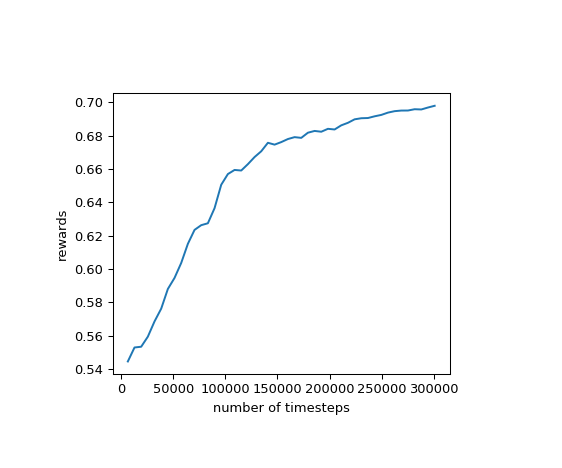

<IPython.core.display.Javascript object>


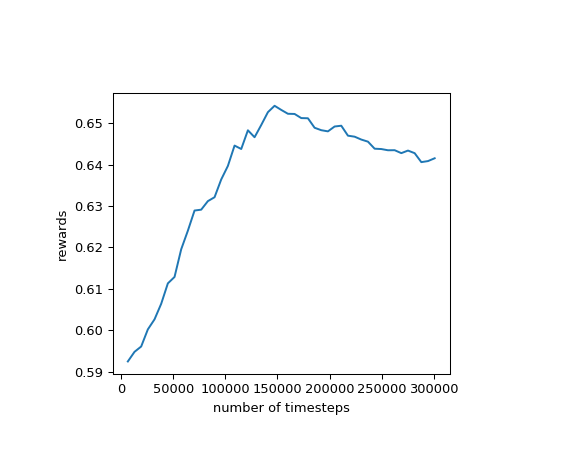

In [9]:
for seed in range(1,4):
    if True:
        print(f'seed {seed}')
        log_dir = './data/'+case+'/seed_'+str(seed)
        os.makedirs(log_dir, exist_ok=True)
        num_cpu = 64
        env_train.seed(seed)
        env_eval.seed(seed)
        env_train_ = env_wrappers(env_train, x_coords, y_coords)
        env_eval_ = env_wrappers(env_eval, x_coords, y_coords)
        train_callback = CustomEvalCallback( env_train_, 
                                            best_model_save_path=None, 
                                            n_eval_episodes=1,
                                            log_path=str(log_dir)+'/results_train', 
                                            eval_freq=100)
        callback_list = [train_callback]
        eval_callback = CustomEvalCallback( env_eval_, 
                                           best_model_save_path=str(log_dir)+'/best_model_eval', 
                                           n_eval_episodes=1,
                                           log_path=str(log_dir)+'/results_eval', 
                                           eval_freq=100)
        callback_list.append(eval_callback)
        callback = CallbackList(callback_list)
        env = SubprocVecEnv([make_env(env_train_, i, seed) for i in range(num_cpu)])
        print(env.observation_space)
#     env = VecMonitor(env, filename=log_dir)
        print(f'seed {seed}: model definition ..')
        model = PPO(policy=MlpPolicy,
            env=env,
            learning_rate = 1e-6,
            n_steps = 50,
            batch_size = 16,
            n_epochs = 20,
            gamma = 0.99,
            gae_lambda = 0.95,
            clip_range = 0.1,
            clip_range_vf = None,
            ent_coef = 0.001,
            vf_coef = 0.5,
            max_grad_norm = 0.5,
            use_sde= False,
            create_eval_env= False,
            policy_kwargs = dict(net_arch=[150,100,80], log_std_init=-2.9),
            verbose = 1,
            target_kl = 0.05,
            seed = seed,
            device = "auto")
        print(f'seed {seed}: learning ..')
        model.learn(total_timesteps=300000, callback=callback)
        model.save(log_dir+'/PPO')
        del model
        fig = plot_learning(log_dir, case='train')
        fig.savefig(log_dir+'/learn_train.png')
        fig = plot_learning(log_dir, case='eval')
        fig.savefig(log_dir+'/learn_eval.png')